# Scan LSST aerosols during 10 years

- Author :Sylvie Dagoret-Campagne
- affiliation : LAL,IN2P3,CNRS
- organization : LSST 

- creation : Tuesday 2nd May 2016
- update : Monday 9th May 2016




In [34]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import h5py
%matplotlib inline
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import libCaliopAOD as cal

In [35]:
#from __future__ import print_function
import datetime
from matplotlib.dates import YearLocator,MonthLocator, WeekdayLocator,DateFormatter
from matplotlib.dates import MONDAY

In [36]:
mondays = WeekdayLocator(MONDAY)
months = MonthLocator(range(1, 13), bymonthday=1, interval=1)
monthsFmt = DateFormatter("%b '%y")

In [55]:
years= YearLocator()
yearsFmt=DateFormatter("%Y")

In [38]:
year_start=2007   # choose the month number
year_stop=2015   # choose the month number
month_start=0      # choose first month
month_stop=11      # choose last month
month_numbers=np.arange(month_start,month_stop+1)
month_stringnumber=['01','02','03','04','05','06','07','08','09','10','11','12']

In [39]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'

In [40]:
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' # 

In [41]:
nb_of_years=year_stop-year_start+1                               # number of years   
number_of_monthes_per_year=month_numbers.shape[0]               # number of months per year
total_number_of_monthes=number_of_monthes_per_year*nb_of_years  # total number of monthes over years

### defines constants

In [42]:
data_dates=np.array(datetime.date(year_start,month_start+1,1))

In [43]:
path_root='/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00'
fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')
filename_base='CAL_LID_L3_APro_AllSky-Standard-V3-00' 

In [44]:

dayfile_fullname=cal.GetL3FilenameDay(path_root,filename_base,year_start,month_start)
nightfile_fullname=cal.GetL3FilenameNight(path_root,filename_base,year_start,month_start)
dayfiles_fullname=np.array(dayfile_fullname)
nightfiles_fullname=np.array(nightfile_fullname)

print 'first day file = ', dayfile_fullname
print 'first night file = ', nightfile_fullname

first day file =  /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2007/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2007-01D.h5
first night file =  /Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/CALIPSO/DATA/ICARE/CALIOP/L3/CAL_LID_L3_APro_AllSky.v3.00/CAL_LID_L3_APro_AllSky.v3.00/2007/hdf5/CAL_LID_L3_APro_AllSky-Standard-V3-00.2007-01N.h5


In [45]:
# initialize the data container
aod_day_first=cal.GetL3Value(dayfile_fullname,'AOD_Mean')
aod_night_first=cal.GetL3Value(nightfile_fullname,'AOD_Mean')
aod_day_coll=np.array(aod_day_first)
aod_night_coll=np.array(aod_night_first)

### defines the list of dates and filenames for days and night

In [46]:
for year in range(2007,2016,1):
    fullpath_root=os.path.join(os.path.join(path_root,str(2007)),'hdf5')   
    for month in range(1,13):
        if not (year == 2007 and month ==1):

            newdayfile=cal.GetL3FilenameDay(path_root,filename_base,year,month-1)
            newnightfile=cal.GetL3FilenameNight(path_root,filename_base,year,month-1)
            newdayaod=cal.GetL3Value(newdayfile,'AOD_Mean')
            newnightaod=cal.GetL3Value(newnightfile,'AOD_Mean')

            dayfiles_fullname=np.append(dayfiles_fullname,newdayfile)
            nightfiles_fullname=np.append(nightfiles_fullname,newnightfile)

            data_dates= np.append( data_dates , datetime.date(year,month,1))
            aod_day_coll=np.append(aod_day_coll,newdayaod)
            aod_night_coll=np.append(aod_night_coll,newnightaod)

In [47]:
print data_dates.shape
print aod_day_coll.shape
print aod_night_coll.shape

(108,)
(108,)
(108,)


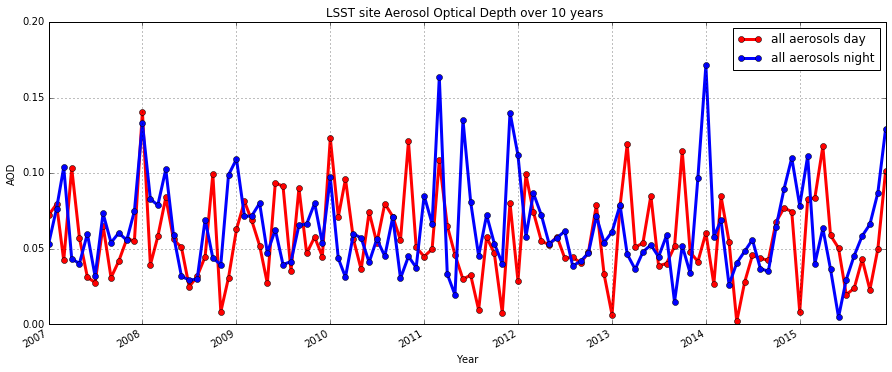

In [56]:
fig=plt.figure(figsize=(15,6))
ax=fig.add_subplot(1,1,1)



#ax.plot_date(dates, all_aod_day,'r-',drawstyle='steps-post',label='all aerosols day',linewidth=3)
#ax.plot_date(dates, all_aod_night,'b-',drawstyle='steps-post',label='all aerosols day',linewidth=3)

ax.plot_date(data_dates, aod_day_coll,'ro-',label='all aerosols day',linewidth=3)
ax.plot_date(data_dates, aod_night_coll,'bo-',label='all aerosols night',linewidth=3)

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(monthsFmt)

#ax.xaxis.set_minor_locator(mondays)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)

title= "LSST site Aerosol Optical Depth over 10 years "
figfilename="Images/LSSTAODvsMonth10Y.pdf" 

ax.set_ylabel('AOD')
ax.set_xlabel('Year')

ax.grid(True)
fig.autofmt_xdate()

plt.title(title)
#plt.lines.Line2D.set_linewidth(2.)
plt.ylim(0,0.2)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

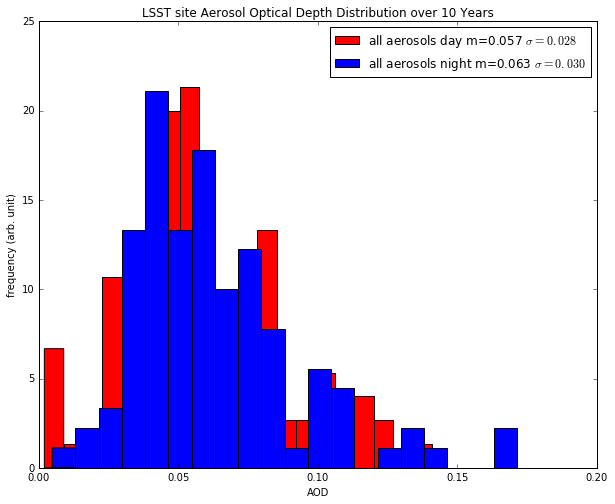

In [57]:
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)

themean_aod_day=aod_day_coll.mean()
themean_aod_night=aod_night_coll.mean()
therms_aod_day=aod_day_coll.std()
therms_aod_night=aod_night_coll.std()

label_day='all aerosols day m=%4.3f $\sigma =%4.3f $' % (themean_aod_day,therms_aod_day)
label_night='all aerosols night m=%4.3f $\sigma =%4.3f $' % (themean_aod_night,therms_aod_night)

ax.hist(aod_day_coll,bins=20, facecolor='r',normed=1,label=label_day)
ax.hist(aod_night_coll,bins=20, facecolor='b',normed=1,label=label_night)
plt.xlim(0,0.2)
ax.set_ylabel('frequency (arb. unit)')
ax.set_xlabel('AOD')
title= "LSST site Aerosol Optical Depth Distribution over 10 Years"
figfilename="Images/DistTribLSSTAOD10Y.pdf" 
ax.set_title(title)
plt.legend(loc='best')
plt.savefig(figfilename, bbox_inches='tight')

## Pandas collection

In [62]:
data_dict = {'dates': data_dates, 'AOD_days': aod_day_coll, 'AOD_nights': aod_night_coll}

In [65]:
dataset=pd.DataFrame(data_dict,columns={'dates','AOD_days','AOD_nights'})

In [66]:
dataset.describe()

,AOD_nights,AOD_days
count,108.000000,108.000000
mean,0.062986,0.057488
std,0.029850,0.028127
min,0.004760,0.001937
25%,0.041767,0.040534
50%,0.057623,0.053263
75%,0.075387,0.075217
max,0.171333,0.140762


In [67]:
dataset.head()

,AOD_nights,dates,AOD_days
0,0.053129,2007-01-01,0.072230
1,0.076607,2007-02-01,0.079548
2,0.103868,2007-03-01,0.042279
3,0.043427,2007-04-01,0.103347
4,0.040217,2007-05-01,0.057246


In [69]:
dataset.tail()

,AOD_nights,dates,AOD_days
103,0.045498,2015-08-01,0.023894
104,0.058503,2015-09-01,0.043053
105,0.066179,2015-10-01,0.022889
106,0.087038,2015-11-01,0.049933
107,0.129083,2015-12-01,0.101236
